## Домашняя работа № 6 - регуляризция

### Мацыкина А.С.

#### Т120-101М-20

# Задача на регуляризцию

Загрузка данных

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

data = pd.read_csv('data/non_linear.csv', sep=',')
data.head()

degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Ridge(alpha=0).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации: 0.119
Качество на обучении: 0.052


C:\Users\UseR\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.97795e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


у класса *Ridge* в конструкторе есть параметр регуляризации - обучите регрессию при $\alpha=0.01$. 

Как изменилась ошибка на обучении? Как изменилась ошибка на валидации? Удалось ли победить переобучение? Используйте степень полинома n=12

In [6]:
# -- ВАШ КОД ТУТ --

# degree = 8, alpha = 0.01

degree = 8

# извлекаем признаки
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values

# разделяем на обучающую и валидационную выборку
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

# обучаем модель
model = Ridge(alpha = 0.01).fit(X_train, y_train)

# получаем предсказания
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)

print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

# ------------------

Качество на валидации: 0.070
Качество на обучении: 0.064


In [7]:
# degree = 12, alpha = 0

degree = 12

X = generate_degrees(data['x_train'], degree)
y = data.y_train.values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

model = Ridge(alpha = 0).fit(X_train, y_train)

y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)

print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации: 0.125
Качество на обучении: 0.051


In [8]:
# degree = 12, alpha = 0.01

degree = 12

X = generate_degrees(data['x_train'], degree)
y = data.y_train.values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

model = Ridge(alpha = 0.01).fit(X_train, y_train)

y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)

print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации: 0.077
Качество на обучении: 0.058


C:\Users\UseR\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.81468e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


При **degree = 8** ошибка на обучении растет, если alpha изменить на 0.01, а ошибка на валидации падает

При **degree = 12** ошибка на обучении тоже растет, если alpha изменить на 0.01, а ошибка на валидации падает

Не удалось переобучить

### Домашняя работа: Lasso vs Ridge

На данных из файла `data/non_linear.csv`
* сгенерируйте данные до степени *degree = 8* включительно
* обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных
* используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей
* постройте два столбчатых графика, на которых отобразите величину коэффициентов в для Ridge регрессии и Lasso регрессии виде столбиков

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](img/coeff_example.png)

Коэффициенты Lasso:
1.6842772269274797
-0.0
-0.0
-0.010829960120060371
-0.00952247248825283
0.0010349017895392011
0.00018787224989761365
3.3878531820096257e-06
-2.148382847188432e-06

Коэффициенты Ridge:
1.1300104311484804
0.4542617851089683
0.34197683261398387
0.03275820907218982
-0.20713453269887322
0.036321631954719984
0.01181941163309684
-0.0036803193238157074
0.00026358552106505427


C:\Users\UseR\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7134369621139327, tolerance: 0.0024481555784964045
  model = cd_fast.enet_coordinate_descent(


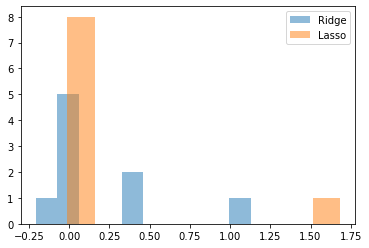

In [58]:
# -- ВАШ КОД ТУТ ---
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt

degree = 8

X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

ridge_model = Ridge(alpha=0.8).fit(X_train, y_train)
lasso_model = Lasso(alpha=0.8).fit(X_train, y_train)

w_ridge = np.append([ridge_model.intercept_], ridge_model.coef_)
w_lasso = np.append([lasso_model.intercept_], lasso_model.coef_)

x = np.arange(degree)
plt.hist(w_ridge, bins=10, alpha=0.5, label='Ridge')
plt.hist(w_lasso, bins=10, alpha=0.5, label='Lasso')


print('Коэффициенты Lasso:', *w_lasso, sep='\n')
print()
print('Коэффициенты Ridge:', *w_ridge, sep='\n')
      

plt.legend()


# ------------------

Коэффициенты близки к нулю

# Домашнее задание: пишем Ridge регрессию.

Мы использовали реализацию Ridge регрессию из библиотеки sklearn. Для того, чтобы  прокачать навыки программирования и освежить в памяти, как перемножать матрицы в numpy, напишите код для вычисления коэффициентов полиномиальной регрессии (для степени *degree=8*) с регуляризацией по формуле
$$
\overline{w} = \left(X^TX + \lambda E\right)^{-1}X^T\overline{y}
$$

Для примера можно ориентироваться на то, как была реализована аналитическая формула для линейной регрессии в модуле "Линейная регрессия. Часть I"

Единичную матрицу $E$ можно получить с помощью функции https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html . Размерность матрицы $k\times k$ (по количеству коэффициентов линейной регрессии). Напоминаю, что количество коэффициентов регрессии совпадает с количеством фичей регрессии, в задании будет $k=8$, т.к. генерим признаки для полинома восьмой степени.

In [68]:
# -- ВАШ КОД ТУТ --
from numpy.linalg import inv, norm
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.spatial import distance


degree = 8
k = 8

X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
E = np.eye(k)


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

X = X_train
y = y_train

w_analytic = np.linalg.inv(X.T.dot(X) + k*E).dot(X.T).dot(y)

print(f'Аналитически определённые коэффициенты {w_analytic}')
# -----------------

Аналитически определённые коэффициенты [ 0.51152727  0.40716153  0.22421288 -0.04867427 -0.17822689  0.08659551
 -0.01446891  0.00083008]


# Домашнее задание: подбираем шаг градиентного спуска 

Очевидно, что чем больше шаг градиентного спуска (параметр *eta0* класса *SGDRegressor*), тем быстрее мы придём к оптимальным значениям. Используя под выше, поиграйтесь с параметром *eta0* и добейтесь , чтобы градиентный спуск закончился быстрее, чем за 200 шагов.

Сколько шагов у вас получилось? Какое качество *RMSE* у Вашего решения? Визуализируйте функцию потерь

In [69]:
# -- ВАШ КОД ТУТ --

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# для регрессии
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
%matplotlib inline

data = pd.read_csv('data/non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()

X = data['x_train'].values.reshape(-1, 1) # превращаем X из простого массива в вектор-столбец
y = data['y_train'].values

# разбиваем на трейн и валидацию
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

data.head()

# ----------------

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


In [90]:
def step_sgd(X_train, 
                   y_train, 
                   X_valid,
                   y_valid,
                   rand_state:int, 
                   eps:float, 
                   eta:float
                  ):
    
    
    # можно установить None для эксперимента

    rand_state = rand_state

    sgd_regressor = SGDRegressor(
        learning_rate='constant',
        eta0=eta,
        fit_intercept=True,
        random_state=rand_state
    )

    # инициализация весов случайным образом
    w_current = np.random.random(2)
    epsilon = eps

    # изменения весов и ошибка на валидации
    weight_evolution, rmse_evolution = [], []

    for step in list(range(800)):
        # шаг градиентного спуска
        sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
        # отслеживаем изменения весов
        weight_evolution.append(
            distance.euclidean(w_current, sgd_regressor.coef_)
        )
        # проверяем критерий остановки
        if weight_evolution[-1] < epsilon:
            print("Итарации остановлены на шаге %d" % step); break
        rmse_evolution.append(
            mean_squared_error(y_valid, sgd_regressor.predict(X_valid))
        )
        # обновление весов регрессии
        w_current = sgd_regressor.coef_.copy()
    
    return sgd_regressor, rmse_evolution, step

In [95]:
etas = np.linspace(0.009, 0.05, num=10)
res = {}

for eta in etas:
    sgd_regressor, rmse_evolution, step =  step_sgd(
        X_train, y_train, X_valid, y_valid, 
        rand_state=42, eps=0.0001, eta=eta
    )
    res[eta] = [sgd_regressor, rmse_evolution, step]
    
min_res = min(res.items(), key=lambda item:item[1][-1])
eta, (sgd_regressor, rmse_evolution, step) = min_res

print('\n',f"Наименьший шаг: {step} с eta {eta:.3f}")

Итарации остановлены на шаге 208
Итарации остановлены на шаге 148
Итарации остановлены на шаге 116
Итарации остановлены на шаге 96
Итарации остановлены на шаге 83
Итарации остановлены на шаге 73
Итарации остановлены на шаге 66
Итарации остановлены на шаге 60
Итарации остановлены на шаге 56
Итарации остановлены на шаге 52

 Наименьший шаг: 52 с eta 0.050


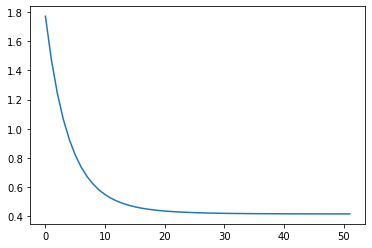

In [99]:
plt.plot(range(step), rmse_evolution)

# Домашнее задание: SGD на многомерных данных

Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [107]:
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score

boston_dataset = load_boston()

X = boston_dataset.data
y = boston_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# -- ВАШ КОД ТУТ --


reg = SGDRegressor(random_state=42).fit(X_train, y_train)
reg.n_iter_, r2_score(reg.predict(X_test), y_test)


# -----------------

(89, -0.4178797019344431)

# Домашняя работа: добавляем регуляризацию в SGD

В реализацию функции `gradient` добавьте параметр $\lambda$, чтобы получить регуляризованный градиентный спуск

Формула поменяется следующим образом:
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} 1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i + 2\cdot 1\right)&\\
\frac{\partial L}{\partial w_k} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i + 2x_k\right)& k\neq 0 \\
\end{array}
\right.
$$

В этом модуле мы узнали, как  обучать линейную регрессию, не "упираясь" в аппаратные ресурсы: использовать градиентный спуск.
Мы узнали, как детектировать переобучение модели и закрепили свои знания на примере полиномиальной регрессии и выяснили, как увеличить качество решения с помощью механизма регуляризации. Познакомились с двумя видами регуляризации -  Ridge и Lasso.

Загружаем исходные данные

In [108]:
import numpy as np
import pandas as pd

data = pd.read_csv('data/non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


Код для SGD

In [116]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gradient(X, y, w, alpha=0) -> np.array:
    # количество обучающих примеров в выборке
    n = X.shape[0]
    # считаем прогноз
    y_hat = X.dot(w.T)
    # вычисляем ошибку прогноза
    #error = y - y_hat
    error = (y - y_hat) + 2 * X
    # дальше pointwise перемножение - умножаем каждую из координат на ошибку
    pointwise_errors = np.multiply(X, error) + X
    # print(pointwise_errors.shape, X.shape, error.shape)
    grad = pointwise_errors.sum(axis=0)*(-1.0)*2.0 / n
    return grad, error

def eval_w_next(X, y, eta, w_current):
    # вычисляем градиент
    grad, error = gradient(X, y, w_current)
    # делаем шаг градиентного спуска
    w_next = w_current - eta*grad
    # проверяем условие сходимости
    weight_evolution = distance.euclidean(w_current, w_next)
    return (w_next, weight_evolution, grad)

def gradient_descent(X: np.array, y: np.array, eta=0.01, epsilon=0.001) -> np.array:
    m = X.shape[1] # количество фичей
    # инициализируем рандомом веса
    w = np.random.random(m).reshape(1, -1)
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
    step = 0
    # повторяем до сходимости вектора весов
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
        step += 1
        if step % 100 ==0:
            print("step %s |w-w_next|=%.5f, grad=%s" % (step, weight_evolution, grad))
    return w

# трансформируем плоский массив X в вектор-столбец
X = data['x_train'].values.reshape(-1, 1)
n = X.shape[0]
# добавляем тривиальный признак w_0, столбец из единиц. См. прошлый урок, почему так
X = np.hstack([
    np.ones(n).reshape(-1,1),
    X
])
w = gradient_descent(X, data['y_train'].values.reshape(-1, 1), eta=0.008)

step 100 |w-w_next|=0.04600, grad=[ 5.52464135 -1.59595905]
step 200 |w-w_next|=0.03786, grad=[ 4.54636994 -1.31335584]
step 300 |w-w_next|=0.03115, grad=[ 3.74132515 -1.08079441]
step 400 |w-w_next|=0.02564, grad=[ 3.07883301 -0.88941361]
step 500 |w-w_next|=0.02110, grad=[ 2.53365113 -0.73192141]
step 600 |w-w_next|=0.01736, grad=[ 2.0850069  -0.60231702]
step 700 |w-w_next|=0.01429, grad=[ 1.71580598 -0.49566222]
step 800 |w-w_next|=0.01176, grad=[ 1.41198102 -0.40789323]
step 900 |w-w_next|=0.00968, grad=[ 1.16195561 -0.33566586]
step 1000 |w-w_next|=0.00796, grad=[ 0.95620326 -0.2762281 ]
step 1100 |w-w_next|=0.00655, grad=[ 0.78688434 -0.22731523]
step 1200 |w-w_next|=0.00539, grad=[ 0.64754743 -0.18706357]
step 1300 |w-w_next|=0.00444, grad=[ 0.53288349 -0.15393944]
step 1400 |w-w_next|=0.00365, grad=[ 0.43852357 -0.12668074]
step 1500 |w-w_next|=0.00301, grad=[ 0.36087236 -0.10424885]
step 1600 |w-w_next|=0.00247, grad=[ 0.29697118 -0.08578907]
step 1700 |w-w_next|=0.00204, gra

# Домашнее задание: извлечение признаков из текста

Реализуем пайплайн в виде функции, при помощи которой обработаем все текстовые описания. Для каждого описания
* проводим токенизацию
* удаляем пунктуацию
* приводим к нижнему регистру
* удаляем стоп-слова


Примените процедуру токенизации к файлу brand_tweets_valid.csv

Сколько уникальных токенов получилось?

In [2]:
import nltk
import string
import pandas as pd

# дополнительный словарь со знаками пунктуации
nltk.download('punkt', download_dir='.')

df = pd.read_csv('data/brand_tweets.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df.drop(df[df.tweet_text.isnull()].index, inplace=True)
print(df.shape)

df.head()

(3904, 3)


[nltk_data] Downloading package punkt to ....
[nltk_data]   Package punkt is already up-to-date!


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\UseR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
def tokenize_text(raw_text: str):
    """Функция для токенизации текста
    
    :param raw_text: исходная текстовая строка
    """
    filtered_tokens = []
    # -- ВАШ КОД ТУТ --
    
    for token in nltk.word_tokenize(raw_text.lower()):
        if token not in string.punctuation and token not in stop_words:
            filtered_tokens.append(token)
    
    # -----------------
    return filtered_tokens

# применяем функцию в датафрейму с помощью метода .apply()
tokenized_tweets= df.tweet_text.apply(tokenize_text)

# добавляем новую колонку в исходный датафрейм
df = df.assign(
    tokenized=tokenized_tweets
)

df.tokenized.head()

0    [wesley83, 3g, iphone, 3, hrs, tweeting, rise_...
1    [jessedee, know, fludapp, awesome, ipad/iphone...
2        [swonderlin, wait, ipad, 2, also, sale, sxsw]
3    [sxsw, hope, year, 's, festival, n't, crashy, ...
4    [sxtxstate, great, stuff, fri, sxsw, marissa, ...
Name: tokenized, dtype: object

In [5]:
ans = []

for list1 in df.tokenized.tolist():
    for word in list1: 
        if word not in ans:
            ans.append(word)
print('Кол-во уникальных индексов =', len(ans))

Кол-во уникальных индексов = 7257


# Домашнее задание: поиск дубликатов в тексте

Потренируйтесь в нахождении матрицы схожести для валидационного сета

загрузите brand_tweets_valid.csv
примените объект vectorizer, обученный на датасете brand_tweets.csv (просто скопируйте этот код из урока)
примените функцию pairwise_distances к полученной матрице

In [6]:
import pandas as pd

df_valid = pd.read_csv('data/brand_tweets_valid.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df_valid.drop(df_valid[df_valid.tweet_text.isnull()].index, inplace=True)

# -- ВАШ КОД ТУТ --
from sklearn.feature_extraction.text import CountVectorizer

# инициализируем объект, который токенизирует наш текст
# в качестве единственного аргимента передаём функцию, которую мы написали в Уроке 2
# на разбивает каждый документ на токены
vectorizer = CountVectorizer(tokenizer=tokenize_text)
# применяем наш объект-токенизатор к датафрейму с твитами
document_matrix = vectorizer.fit_transform(df_valid.tweet_text.values)
# результат - матрица, в которой находятся числа, строк в мастрице столько, сколько документов
# а столбцов столько, сколько токенов
document_matrix

from sklearn.metrics import pairwise_distances

tweet_distance = 1-pairwise_distances(document_matrix, metric="cosine")

tweet_distance.shape
# -----------------

(402, 402)

* Пользуясь матрицей схожести, полученной на предыдущем этапе, найдите top-5 твитов, похожих на твит валидационного сета с id=14.


In [9]:
# топ 5 твитов
import numpy as np

source_tweet_index = 14
print('Твит с id 14:')
print(df_valid.iloc[source_tweet_index].tweet_text)
print()

sorted_similarity = np.argsort(-tweet_distance[source_tweet_index,:])
print('Топ 5 похожих твитов:')
print()
for i in range(6):
    print(df.iloc[sorted_similarity[i]].tweet_text, end='\n\n')

Твит с id 14:
Popup Apple Store crew has been giving out water to the people in line but they are in street clothes. No Apple logos anywhere yet. #SXSW

Топ 5 похожих твитов:

haha, awesomely rad iPad app by @madebymany http://bit.ly/hTdFim #hollergram #sxsw

#Samsung, #Sony follow #Apple, #HP lead @mention {link} #Austin #atx #SXSW

I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone

Following #sxsw Tweets on Google Realtime, four platforms on Tweet Deck and listening to panel, realizing I'm spoken to no one here today.

#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan

Posted up at the DMI House, Intimate Stranger on the stage, they got a restaurant crowd sitting down to deal wif  #sxsw {link}



У вас есть матрица схожести между объектами. Попробуйте решить задачу поиска дубликатов в тексте

1. Визуализируйте гистограмму значений в матрице схожести


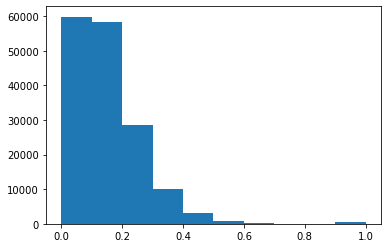

In [14]:
import matplotlib.pyplot as plt

x,y = np.histogram(tweet_distance)
plt.hist(y[:-1], y, weights=x)
plt.show()

2. Напишите функцию на Python, которая принимает индекс твита, пороговое значение (число от $0.0$ до $1.0$) и матрицу схожести, а затем выводит все твиты, схожесть которых больше, чем пороговое значение

In [31]:
def similar_tweets(tweet_id:int, threshold:float, tweet_distance):
    ans = []
    
    sorted_similarity = np.argsort(-tweet_distance[tweet_id,:])
    
    for index in sorted_similarity:
        similarity = tweet_distance[tweet_id][index]
        if similarity < threshold:
            continue
        ans.append((index, similarity))
    return ans


res = similar_tweets(14, 0.1, tweet_distance)

for i in res:
    print(f'Cхожесть: {i[1]}', df.iloc[sorted_similarity[i[0]]].tweet_text, sep='\n', end='\n\n')

Cхожесть: 1.0
If I were at #SXSW I could spend it all at the @mention Teaching Theater alone; just look at that schedule: {link}

Cхожесть: 0.5118906968889915
The new #4sq3 looks like it is going to rock. Update for iPhone and Android should push tonight http://bit.ly/etsbZk #SXSW #KeepAustinWeird

Cхожесть: 0.4850712500726658
@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw

Cхожесть: 0.45834924851410563
My iPhone and I are both VERY thirsty! #sxsw (@mention Chevy Volt Lounge w/ 16 others) {link}

Cхожесть: 0.4244373438135828
At #sxsw? @mention / @mention wanna buy you a drink. 7pm at Fado on 4th. {link} Join us!

Cхожесть: 0.40422604172722154
#technews Apple saves SXSW, set to open pop-up store {link} #Tech_News #Apple #SXSW #tech

Cхожесть: 0.38892223413129867
google is about search, but local' marissa mayer #sxsw

Cхожесть: 0.3834824944236852
RT @LaurieShook: I'm looking forward to the #SMCDallas pre #SXSW party Wed., and hoping I'll win an #iPad r